In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv("heart.csv")

# Display the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df["restecg"].value_counts()

restecg
1    513
0    497
2     15
Name: count, dtype: int64

In [4]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
# Basic statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


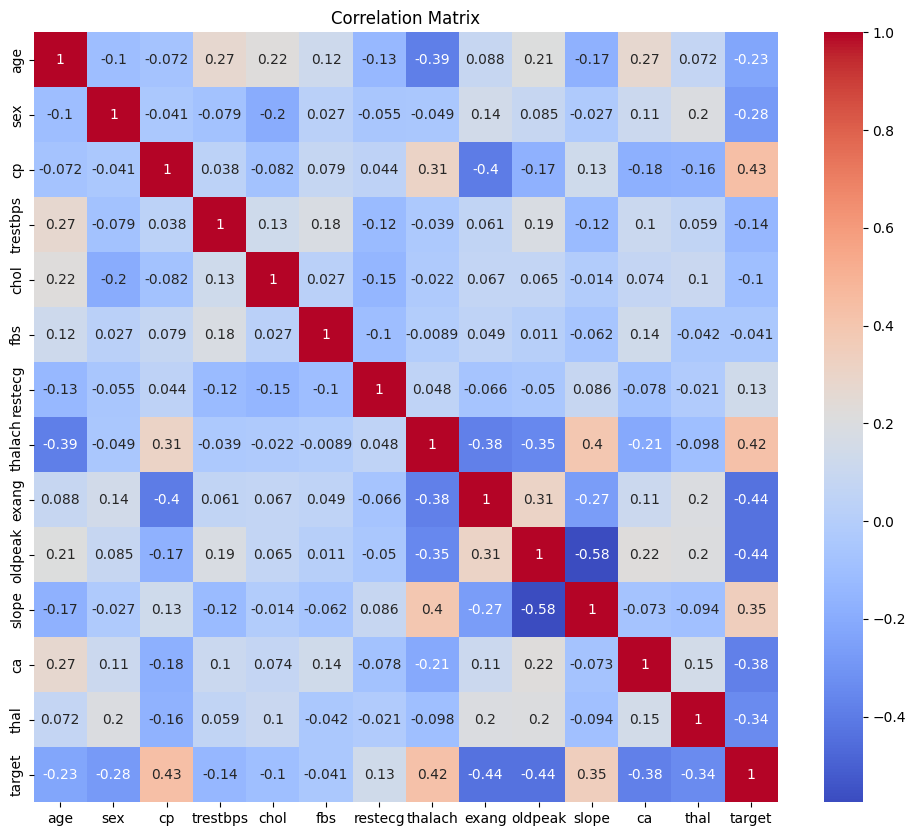

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

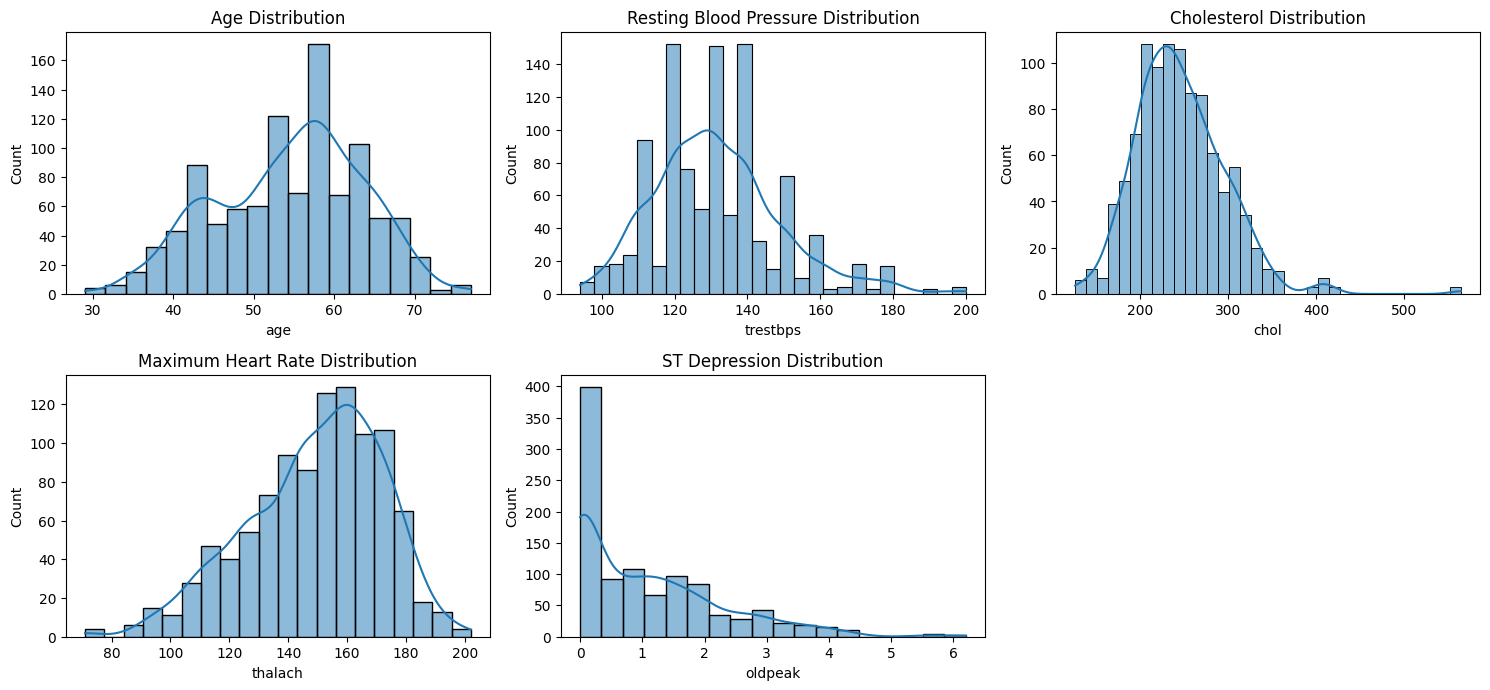

In [8]:
# Distribution plots for some features
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(3, 3, 2)
sns.histplot(df['trestbps'], kde=True)
plt.title('Resting Blood Pressure Distribution')

plt.subplot(3, 3, 3)
sns.histplot(df['chol'], kde=True)
plt.title('Cholesterol Distribution')

plt.subplot(3, 3, 4)
sns.histplot(df['thalach'], kde=True)
plt.title('Maximum Heart Rate Distribution')

plt.subplot(3, 3, 5)
sns.histplot(df['oldpeak'], kde=True)
plt.title('ST Depression Distribution')

plt.tight_layout()
plt.show()


In [9]:
# Define the features and the target variable
x = df.drop(columns='target')
y = df['target']


In [10]:
from sklearn.model_selection import train_test_split

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
# Create pipelines for each model
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
pipeline_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipeline_dt = Pipeline([('dt', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf', RandomForestClassifier())])
pipeline_gbc = Pipeline([('gbc', GradientBoostingClassifier())])

In [14]:
# List of pipelines
pipelines = [pipeline_lr, pipeline_knn, pipeline_svc, pipeline_dt, pipeline_rf, pipeline_gbc]
pipe_dict = {0: 'Logistic Regression', 1: 'KNN', 2: 'SVC', 3: 'Decision Tree', 4: 'Random Forest', 5: 'Gradient Boosting'}

In [16]:
# Train and evaluate each model
for i, pipe in enumerate(pipelines):
    pipe.fit(xtrain, ytrain)
    y_pred = pipe.predict(xtest)
    print(f"{pipe_dict[i]} Accuracy: {accuracy_score(ytest, y_pred):.2f}")

Logistic Regression Accuracy: 0.80
KNN Accuracy: 0.83
SVC Accuracy: 0.89
Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99
Gradient Boosting Accuracy: 0.93


In [17]:
# Fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

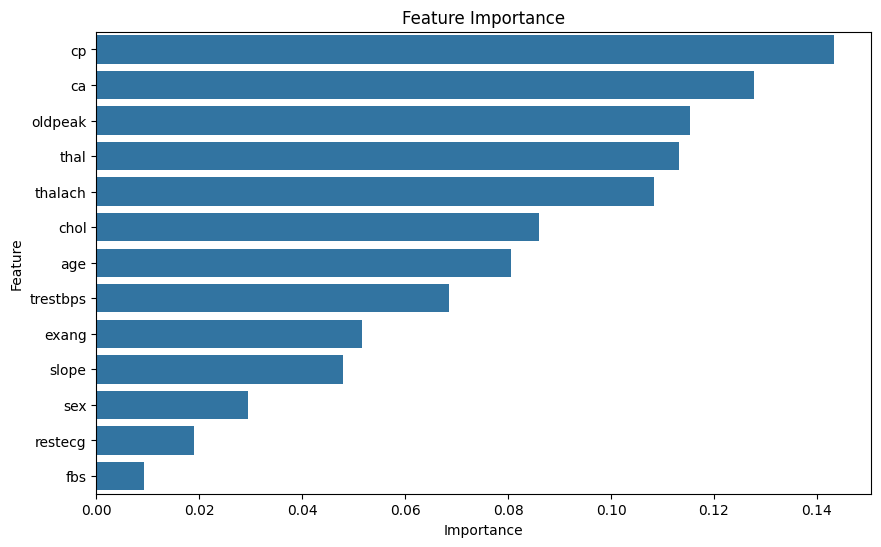

In [18]:
# Feature importance
importance = rf.feature_importances_
features = x.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [19]:
# Example new data
new_data = pd.DataFrame({
    'age': [63],
    'sex': [1],
    'cp': [3],
    'trestbps': [145],
    'chol': [233],
    'fbs': [1],
    'restecg': [0],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [0],
    'ca': [0],
    'thal': [1]
})


In [21]:
# Predict using the Random Forest model
prediction = rf.predict(new_data)
print(prediction)
print('Heart Disease Prediction:', 'Yes' if prediction[0] == 1 else 'No')

[1]
Heart Disease Prediction: Yes


In [24]:
#saving the model
import joblib
joblib.dump(rf,"heart_deases_prediction_model")

['heart_deases_prediction_model']